In [56]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

Data Understanding and Exploration

In [34]:
train_data = pd.read_csv(r"C:\Users\malli\Downloads\DS_ML Coding Challenge Dataset - Training Dataset.csv")
test_data = pd.read_csv(r"C:\Users\malli\Downloads\DS_ML Coding Challenge Dataset - Test Dataset.csv")
print(train_data)
print(test_data)

       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0             NTM3           X1       A28        WHOLESALE        Large   
1             NTM2           X1        A9           DIRECT        Large   
2             NTM3           X2       A20           DIRECT        Large   
3             NTM3           X1       A18        WHOLESALE        Small   
4             NTM2           X1       A28           DIRECT        Large   
...            ...          ...       ...              ...          ...   
550171        NTM2           X1        A5           DIRECT        Large   
550172        NTM3           X1       A14           DIRECT        Large   
550173        NTM2           X1        A5           DIRECT        Small   
550174        NTM2           X1        A7           DIRECT        Small   
550175        NTM1           X1        A3           DIRECT        Small   

       Product Type Month of Sourcing  Sourcing Cost  
0            Powder            May-21       

In [35]:
train_data.shape
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


In [36]:
test_data.shape
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductType        96 non-null     object 
 1   Manufacturer       96 non-null     object 
 2   Area Code          96 non-null     object 
 3   Sourcing Channel   96 non-null     object 
 4   Product Size       96 non-null     object 
 5   Product Type       96 non-null     object 
 6   Month of Sourcing  96 non-null     object 
 7   Sourcing Cost      96 non-null     float64
dtypes: float64(1), object(7)
memory usage: 6.1+ KB


In [37]:
train_data=train_data.drop_duplicates()
train_data.shape

(7380, 8)

In [38]:
test_data=test_data.drop_duplicates()
test_data.shape

(96, 8)

In [39]:
train_data.isna().sum()
test_data.isna().sum() 

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [40]:
train_data = train_data.sort_values(by='ProductType')
print(train_data)

       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
139626        NTM1           X2       A12           DIRECT        Large   
138833        NTM1           X1        A3           DIRECT        Large   
138834        NTM1           X1       A11           DIRECT        Large   
138835        NTM1           X1        A3           DIRECT        Small   
138836        NTM1           X1        A8           DIRECT        Large   
...            ...          ...       ...              ...          ...   
140514        NTM3           X1       A28           DIRECT        Small   
140525        NTM3           X1       A25           RETAIL        Large   
140530        NTM3           X1       A28           DIRECT        Small   
140381        NTM3           X1       A44           DIRECT        Small   
549942        NTM3           X1       A35           DIRECT   ExtraLarge   

       Product Type Month of Sourcing  Sourcing Cost  
139626       Powder            May-21       

In [41]:
train_data.dtypes

ProductType           object
Manufacturer          object
Area Code             object
Sourcing Channel      object
Product Size          object
Product Type          object
Month of Sourcing     object
Sourcing Cost        float64
dtype: object

In [42]:
categorical_cols = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type', 'Month of Sourcing']
for col in categorical_cols:
    train_data[col] = train_data[col].astype('category')

In [43]:
train_data.dtypes

ProductType          category
Manufacturer         category
Area Code            category
Sourcing Channel     category
Product Size         category
Product Type         category
Month of Sourcing    category
Sourcing Cost         float64
dtype: object

In [44]:
train_data.describe

<bound method NDFrame.describe of        ProductType Manufacturer Area Code Sourcing Channel Product Size  \
139626        NTM1           X2       A12           DIRECT        Large   
138833        NTM1           X1        A3           DIRECT        Large   
138834        NTM1           X1       A11           DIRECT        Large   
138835        NTM1           X1        A3           DIRECT        Small   
138836        NTM1           X1        A8           DIRECT        Large   
...            ...          ...       ...              ...          ...   
140514        NTM3           X1       A28           DIRECT        Small   
140525        NTM3           X1       A25           RETAIL        Large   
140530        NTM3           X1       A28           DIRECT        Small   
140381        NTM3           X1       A44           DIRECT        Small   
549942        NTM3           X1       A35           DIRECT   ExtraLarge   

       Product Type Month of Sourcing  Sourcing Cost  
139626    

In [45]:
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(train_data[col].unique())
    print(f"\nValue counts for '{col}':")
    print(train_data[col].value_counts())


Unique values in 'ProductType':
['NTM1', 'NTM2', 'NTM3']
Categories (3, object): ['NTM1', 'NTM2', 'NTM3']

Value counts for 'ProductType':
ProductType
NTM2    3086
NTM1    2225
NTM3    2069
Name: count, dtype: int64

Unique values in 'Manufacturer':
['X2', 'X1', 'X3']
Categories (3, object): ['X1', 'X2', 'X3']

Value counts for 'Manufacturer':
Manufacturer
X1    5334
X2    1863
X3     183
Name: count, dtype: int64

Unique values in 'Area Code':
['A12', 'A3', 'A11', 'A8', 'A1', ..., 'A13', 'A24', 'A14', 'A18', 'A20']
Length: 45
Categories (45, object): ['A1', 'A10', 'A11', 'A12', ..., 'A6', 'A7', 'A8', 'A9']

Value counts for 'Area Code':
Area Code
A44    797
A28    536
A3     438
A8     411
A7     380
A11    372
A35    371
A25    365
A32    277
A10    243
A21    224
A2     210
A22    183
A29    179
A31    175
A18    137
A4     130
A12    126
A16    125
A38    121
A9     121
A6     113
A45    105
A13    102
A1      97
A5      94
A20     92
A19     89
A15     88
A42     75
A37     73
A2

Exploratory Data Analysis 

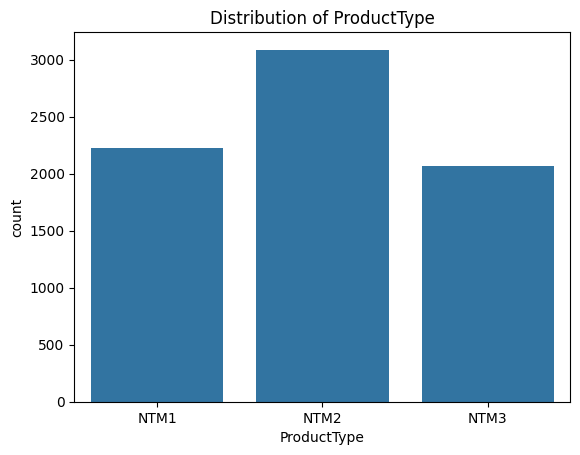

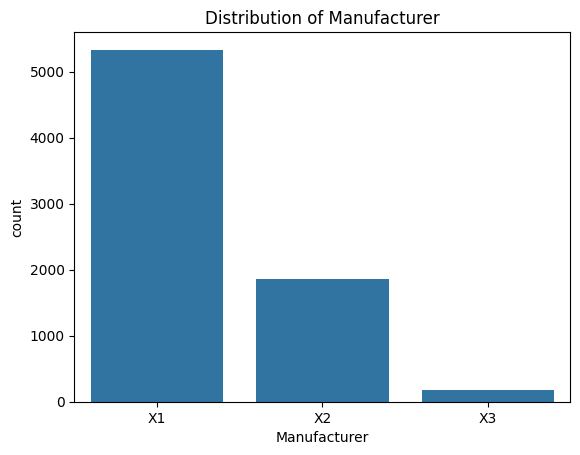

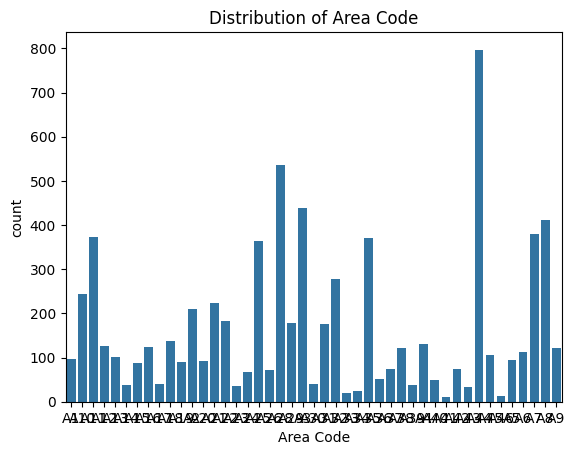

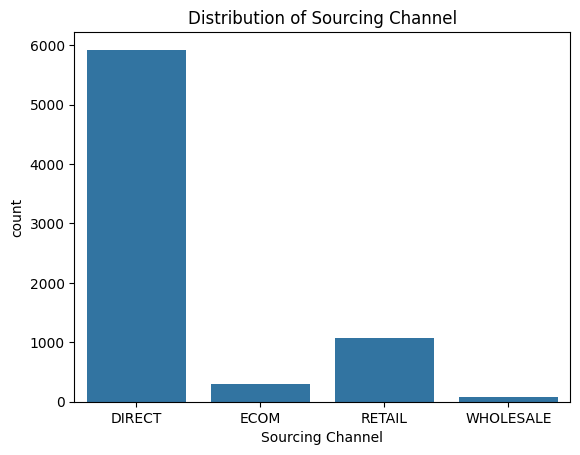

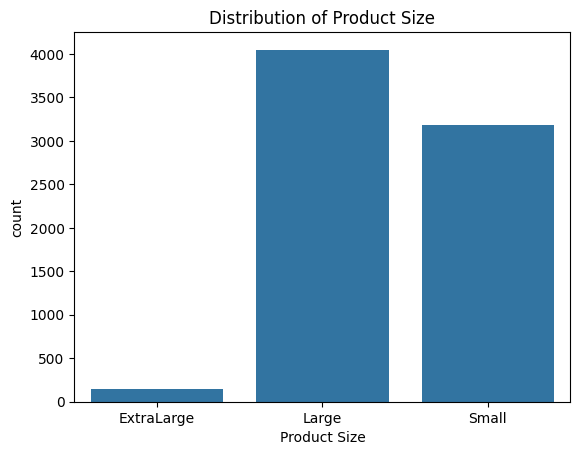

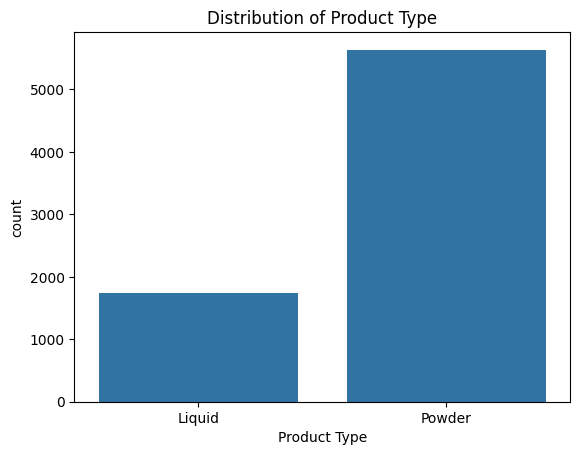

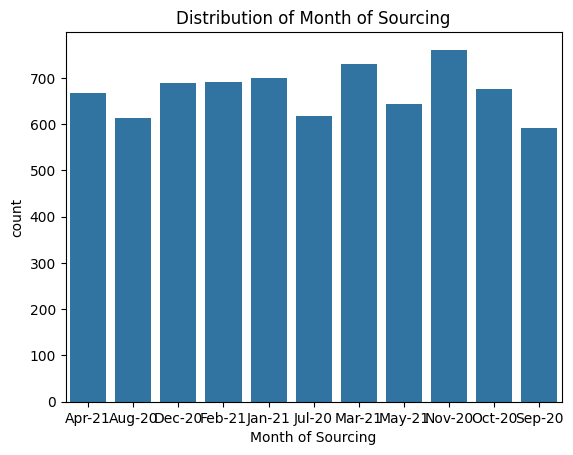

In [46]:
## Visualizing Features
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=train_data, x=col)
    plt.title(f"Distribution of {col}")
    plt.show()

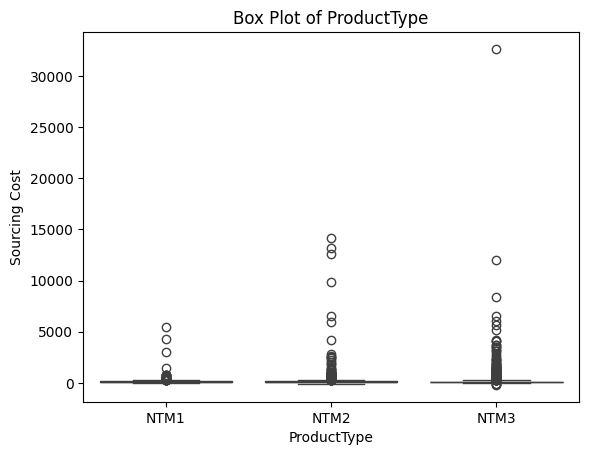

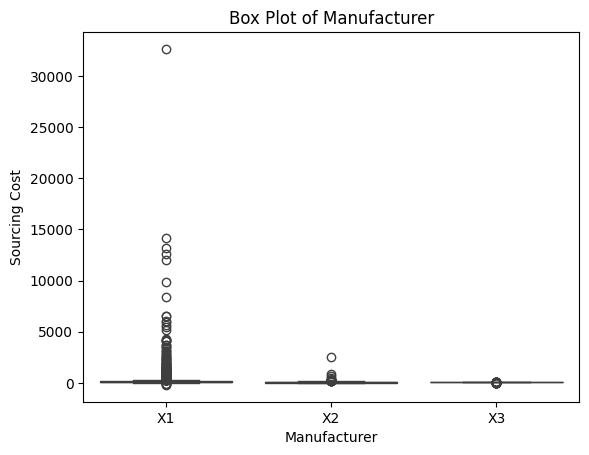

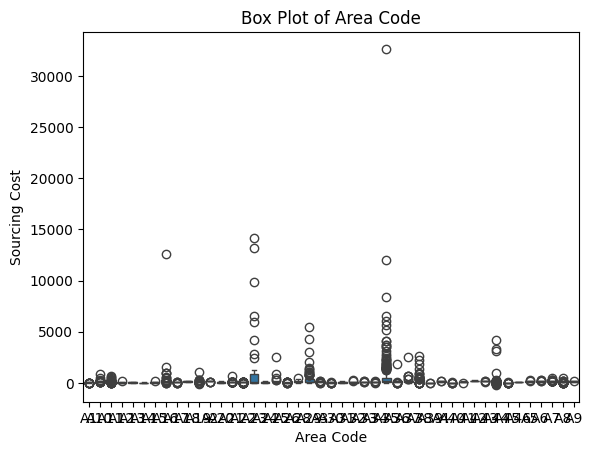

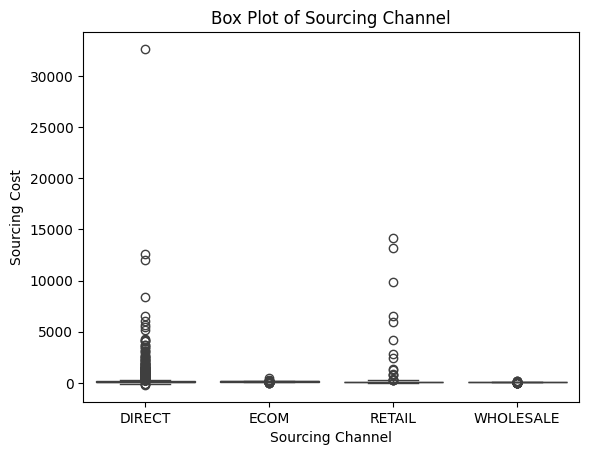

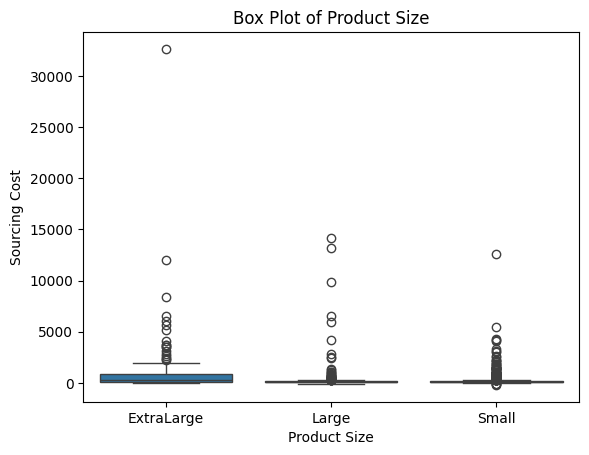

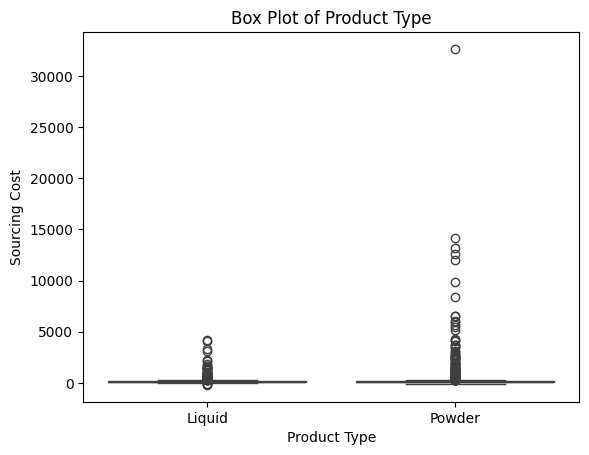

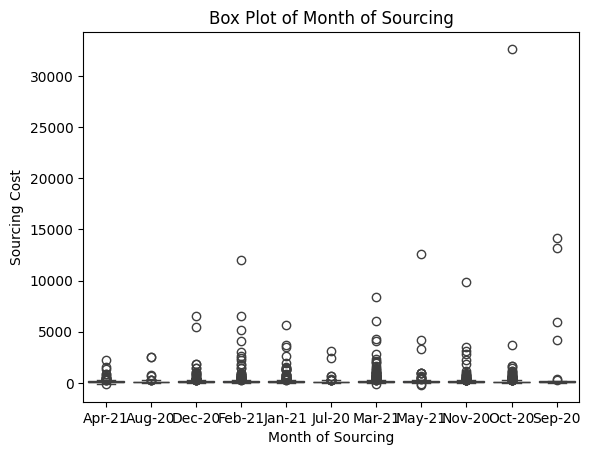

In [47]:
for col in categorical_cols:
    plt.figure()
    sns.boxplot(data=train_data, x=col, y="Sourcing Cost")
    plt.title(f"Box Plot of {col}")
    plt.show()

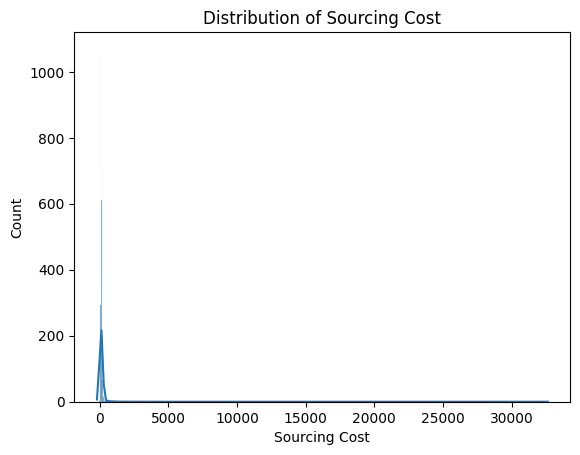

In [48]:
plt.figure()
sns.histplot(data=train_data, x="Sourcing Cost", kde=True)
plt.title("Distribution of Sourcing Cost")
plt.show()

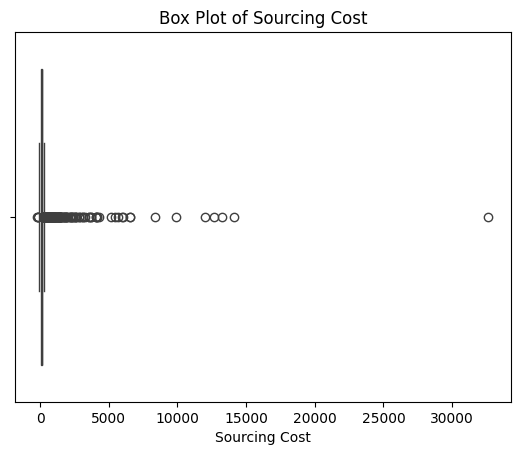

In [49]:
plt.figure()
sns.boxplot(data=train_data, x="Sourcing Cost")
plt.title("Box Plot of Sourcing Cost")
plt.show()

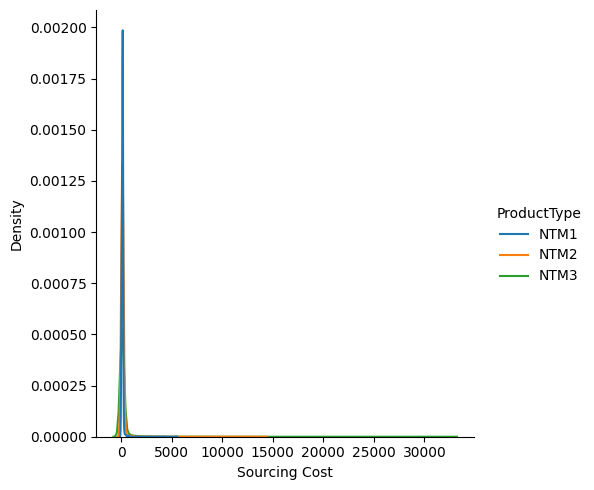

In [55]:
sns.displot(kind="kde",data=train_data,x="Sourcing Cost", hue="ProductType")
plt.show()